## Case Study 2: Bank Loan Dataset
* Thera Bank customer database is used for this study

### Attributes Data descriptor

* Attribute 1: Customer ID for each of the customers sampled
* Attribute 2: Customer age in completed years (rounded off to nearest integer)
* Attribute 3: Yrs of professional experience (rounded off to nearest integer)
* Attribute 4: Income in (K-USD)
* Attribute 5: Zip code for home address of customer 
* Attribute 6: Family size of customer 
* Attribute 7: CCAvg - Avg. credit card spending per month (K-USD) 
* Attribute 8: Education level (1-UG, 2-Grad, 3-Adv/Pro)
* Attribute 9: Value of house mortgage (K-USD)- if availed - else 0 
* Target Variable 10: Personal Loan (Binary classification - Y/N - 1/0)
* Attribute 11: Securities account exists for customer(Y/N) - Binary (1/0)
* Attribute 12: CD account exists for customer (Y/N) - Binary (1/0)
* Attribute 13: Customer uses online or not (Y/N)- Binary (1/0)
* Attribute 14: Does the customer use Universal bank credit card (Y/N- 1/0)

### Objective: To build a customer profile model to target for the bank's personal loan marketing campaign 

In [18]:
# import libraries and other commands for convenience
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import show
import seaborn as sns # for statistical plots
%matplotlib inline
#
# Print output for every line of code
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity="all"
import warnings
warnings.filterwarnings("ignore")

### Read Bank customer data as dataframe

In [19]:
bank_df=pd.read_csv("Bank_Personal_Loan_Modelling.csv")
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Basic EDA

In [20]:
print("Bank dataframe Shape:", bank_df.shape,'\n');
bank_df.info();
bank_df.describe().T

Bank dataframe Shape: (5000, 14) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


## Univariate Plots

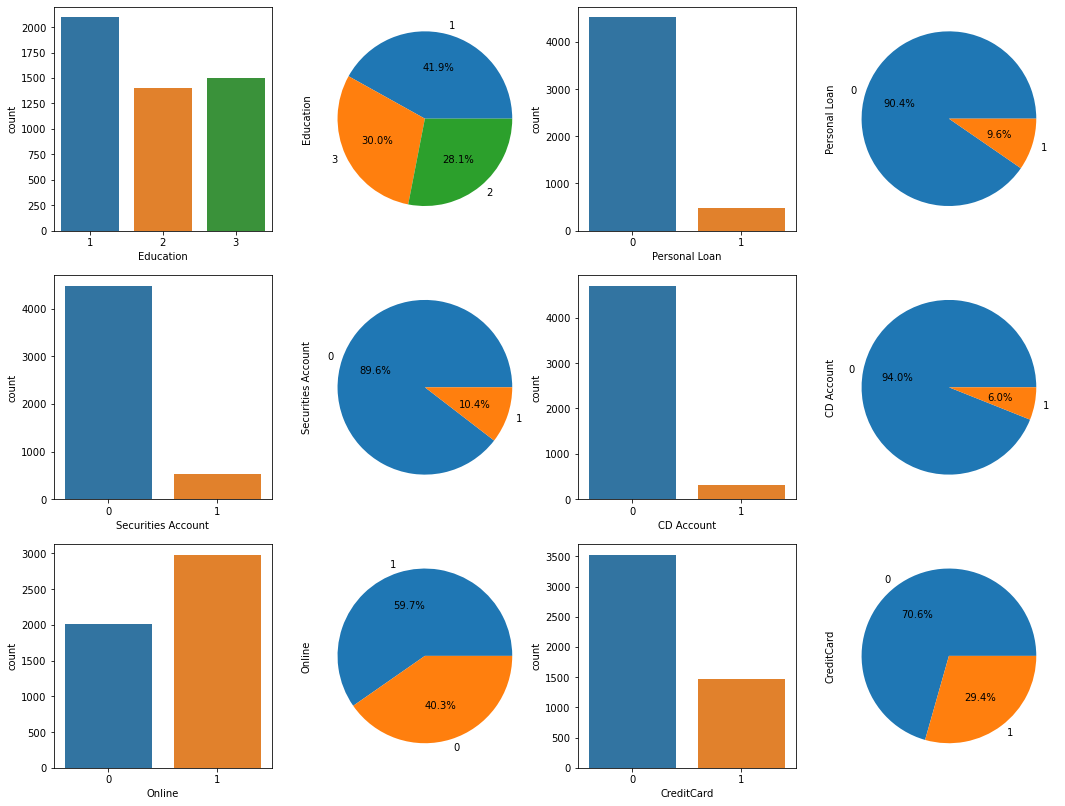

In [21]:
# separate the two sets
cat_cols = ['Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']
num_cols = ['Age','Experience','Income','Family','CCAvg']
#
# plot countplots for categorical variables
fig, ax = plt.subplots(3,4,figsize=(18,14));
ax=ax.flatten();
j=0

for i in cat_cols:
    sns.countplot(bank_df[i],ax=ax[j]);
    bank_df[i].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[j+1]);
    j+=2 

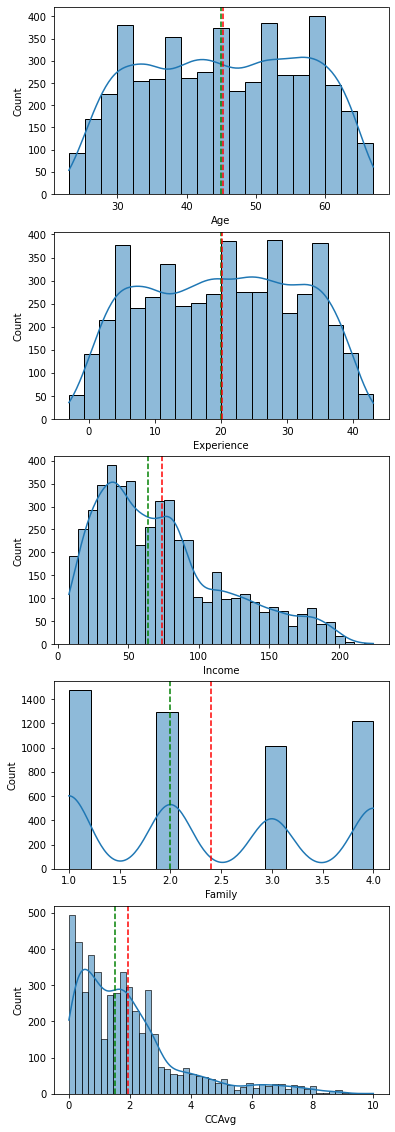

In [22]:
# plot histplots for numerical variables
fig, ax = plt.subplots(5,1,figsize=(6,20));
ax=ax.flatten();
j=0

for i in num_cols:
    sns.histplot(bank_df[i],ax=ax[j], kde="True");
    ax[j].axvline(bank_df[i].median(),ls='--',c="g");
    ax[j].axvline(bank_df[i].mean(),ls='--',c="r");
    j+=1 

## Bivariate Plots

<AxesSubplot:xlabel='Personal Loan', ylabel='Age'>

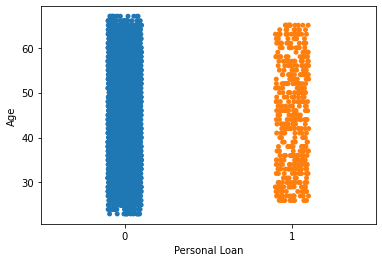

In [25]:
sns.stripplot(bank_df['Personal Loan'],bank_df['Age'],jitter=True)

<AxesSubplot:xlabel='Personal Loan', ylabel='CCAvg'>

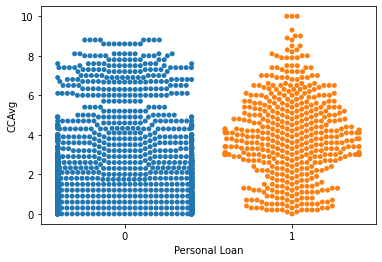

In [26]:
sns.swarmplot(bank_df['Personal Loan'],bank_df['CCAvg'])

<AxesSubplot:xlabel='Personal Loan', ylabel='Income'>

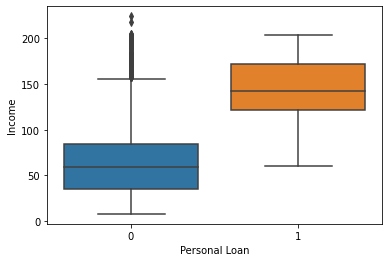

In [27]:
sns.boxplot(bank_df['Personal Loan'],bank_df['Income'])

<AxesSubplot:xlabel='Personal Loan', ylabel='CCAvg'>

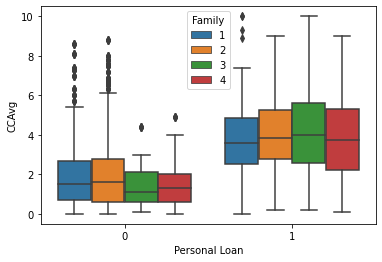

In [28]:
sns.boxplot(bank_df['Personal Loan'],bank_df['CCAvg'],hue=bank_df['Family'])

<AxesSubplot:xlabel='Personal Loan', ylabel='Mortgage'>

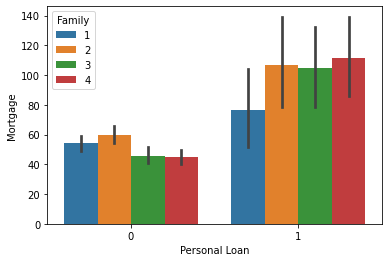

In [29]:
sns.barplot(bank_df['Personal Loan'],bank_df['Mortgage'],hue=bank_df['Family'])

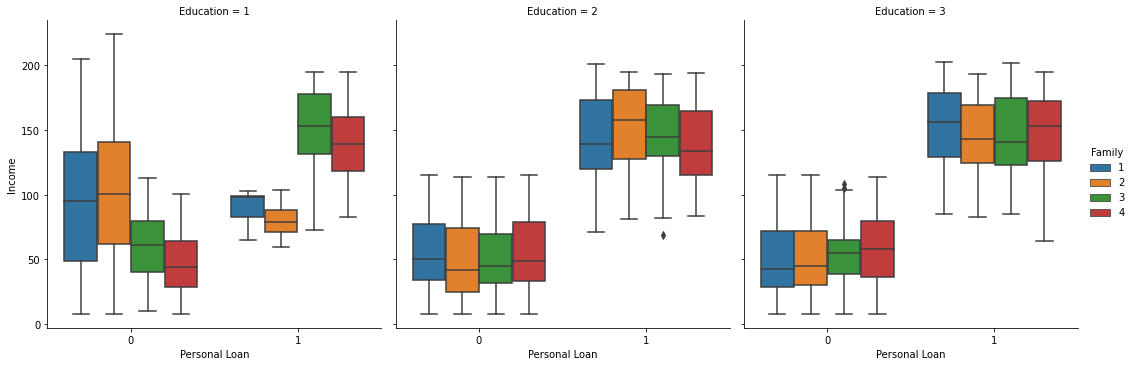

In [31]:
sns.catplot(x='Personal Loan',y='Income',hue='Family',col='Education',data=bank_df,kind='box')

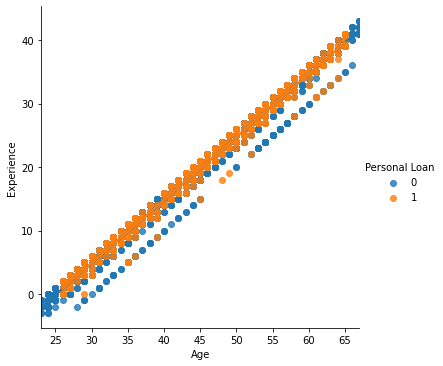

In [32]:
sns.lmplot(x='Age',y='Experience',data=bank_df,hue='Personal Loan')

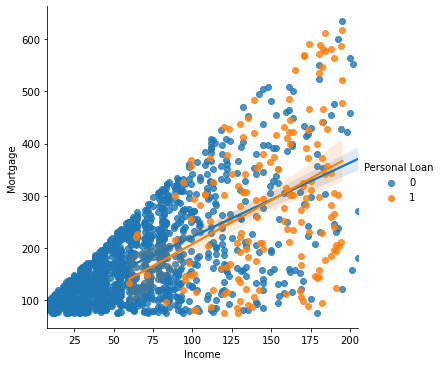

In [33]:
temp=bank_df[bank_df['Mortgage']>0]
sns.lmplot(x='Income',y='Mortgage',data=temp,hue='Personal Loan')

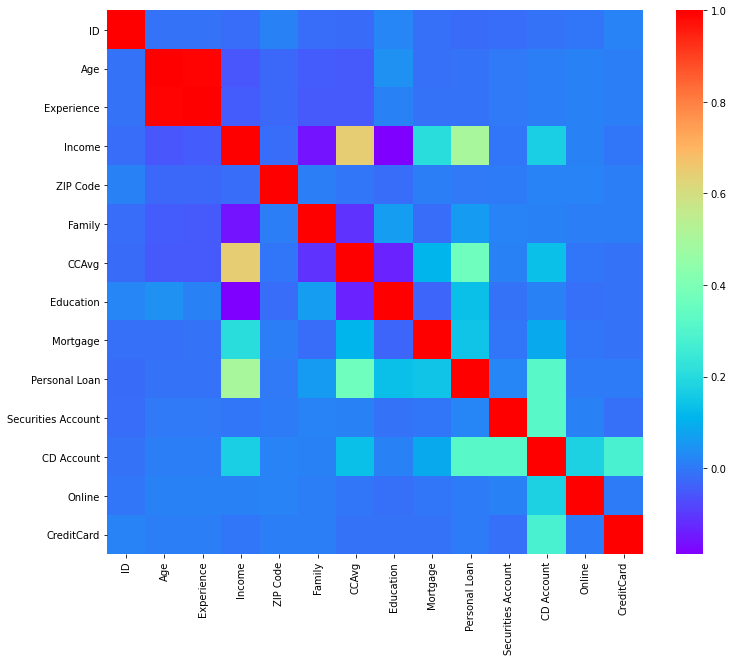

In [34]:
plt.figure(figsize=(12,10))
sns.heatmap(bank_df.corr(),cmap='rainbow');

In [35]:
bank_geo=bank_df.groupby(by='ZIP Code',axis=0)
bank_geo_avg=bank_geo.mean()
bank_geo_avg.sort_values(by='Age',ascending=False)

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ZIP Code,,,,,,,,,,,,,
92694,3024.00,63.000000,37.000000,105.000000,4.000000,1.700000,3.00,244.000000,0.00,0.0,0.00,0.000000,1.000000
91207,2631.00,61.500000,36.000000,30.500000,1.500000,1.000000,2.00,61.500000,0.00,0.0,0.00,1.000000,0.500000
91326,751.50,60.000000,35.500000,142.000000,1.000000,4.150000,1.00,183.000000,0.00,0.0,0.00,1.000000,0.000000
94965,2655.00,60.000000,36.000000,49.000000,4.000000,2.200000,1.00,204.000000,0.00,1.0,0.00,1.000000,0.000000
93003,3923.75,57.500000,32.750000,67.500000,3.250000,1.550000,2.75,54.750000,0.25,0.0,0.25,0.750000,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92161,2531.00,30.500000,2.500000,51.500000,4.000000,1.550000,3.00,0.000000,0.00,0.0,0.00,0.500000,0.000000
95045,2922.40,30.000000,3.200000,52.800000,3.600000,1.960000,2.60,38.400000,0.00,0.2,0.00,0.800000,0.200000
94566,2633.00,29.666667,4.666667,76.333333,1.666667,1.566667,2.00,106.333333,0.00,0.0,0.00,0.666667,0.333333


<AxesSubplot:xlabel='Age', ylabel='count'>

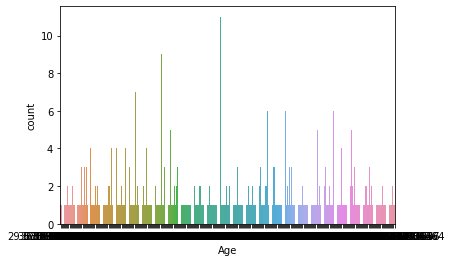

In [36]:
bank_geo_avg
sns.countplot(bank_geo_avg['Age'])

## Case Study 3 : IPL Dataset

**Domain:** SPORTS MANAGEMENT

<b>Context:</b> Company IMG-Reliance is a sports management company for international cricket.

<b>Data Description:</b>The data is collected belongs to batsman from 2012 IPL season 

**Attribute Information:** <br>

1. **Runs**: Runs score by the batsman 
2. **Ave**: Average runs scored by the batsman per match
3. **SR**: strike rate of the batsman
4. **Fours**: number of boundary/four scored
5. **Six**: number of boundary/six scored
6. **HF**: number of half centuries scored so far

### **Objective:** Goal is to build a data driven batsman ranking model for IMG-Reliance Marketing Department

In [37]:
# Import Plotly also
import plotly.express as px

In [38]:
# load the data and check first 10 entries
ipl = pd.read_csv('Part4 - batting_bowling_ipl_bat.csv')
ipl.head(10)

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0


In [39]:
# drop empty rows
ipl = ipl.dropna(axis=0)
ipl.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0


## **EDA:** Exploratory Data Analysis

In [40]:
# check shape of the dataset
print("Shape of IPL dataset: ",ipl.shape, "Size of IPL dataset: ", ipl.size)

Shape of IPL dataset:  (90, 7) Size of IPL dataset:  630


In [41]:
# check data type
ipl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [42]:
# check for duplicates
print("No. of duplicate rows: ", ipl[ipl.duplicated(keep=False)].shape[0])

No. of duplicate rows:  0


In [43]:
# check 5-pt summary
ipl.describe()

,Runs,Ave,SR,Fours,Sixes,HF
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,219.933333,24.729889,119.164111,19.788889,7.577778,1.188889
std,156.253669,13.619215,23.656547,16.399845,8.001373,1.688656
min,2.000000,0.500000,18.180000,0.000000,0.000000,0.000000
25%,98.000000,14.665000,108.745000,6.250000,3.000000,0.000000
50%,196.500000,24.440000,120.135000,16.000000,6.000000,0.500000
75%,330.750000,32.195000,131.997500,28.000000,10.000000,2.000000
max,733.000000,81.330000,164.100000,73.000000,59.000000,9.000000


In [44]:
# create new column %runs in boundaries
ipl['bdr_runs_pct'] = round((ipl['Fours']*4+ipl['Sixes']*6)/(ipl['Runs'])*100,2)
ipl.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF,bdr_runs_pct
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,73.40
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,60.68
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,69.09
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0,59.29
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,59.75


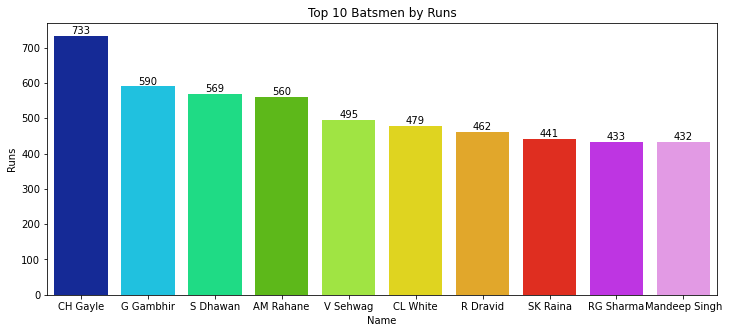

In [45]:
# top 10 players by Runs
plt.figure(figsize=(12,5))
#fig, ax = plt.subplots(1,1,figsize=(12,10));
temp = ipl.sort_values(by='Runs',ascending = False ).head(10)
temp = temp.reset_index() 

chart = sns.barplot(data= temp , x= 'Name' , y ='Runs',palette ='gist_ncar');
chart.set_title("Top 10 Batsmen by Runs");
#
# annotation here
for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

In [46]:
fig = px.bar(temp, x='Name', y='Runs')
fig.show()

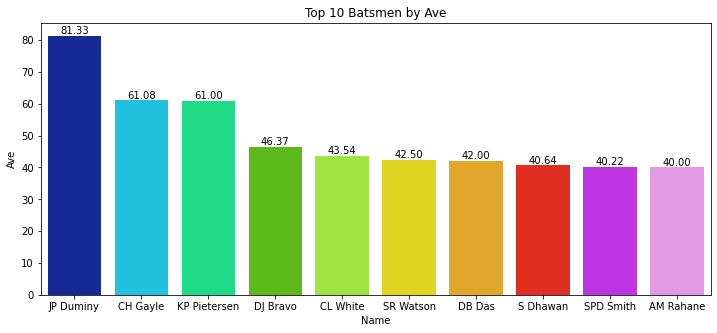

In [47]:
# top 10 players by Ave
plt.figure(figsize=(12,5))
temp = ipl.sort_values(by='Ave',ascending = False ).head(10)
temp = temp.reset_index() 
#
#
chart = sns.barplot(data= temp , x= 'Name' , y ='Ave',palette ='gist_ncar');
chart.set_title("Top 10 Batsmen by Ave");
#
# annotation here
for p in chart.patches:
             chart.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

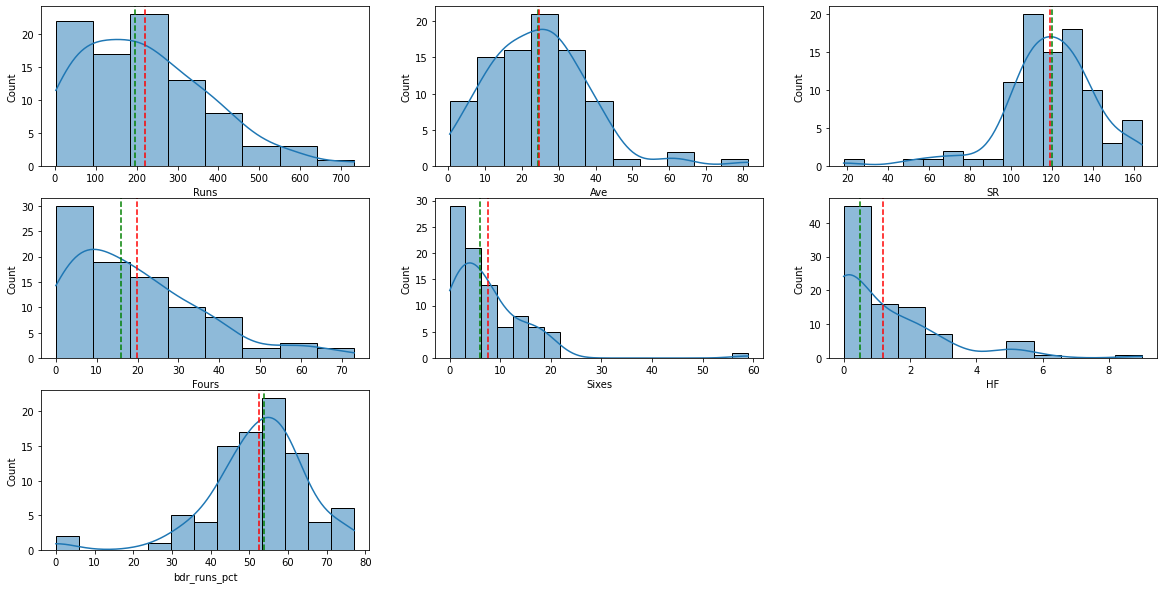

In [48]:
# plot histplots
fig, ax = plt.subplots(3,3,figsize=(20,10))
fig.delaxes(ax[2,1])
fig.delaxes(ax[2,2])
ax=ax.flatten()
j=0
cols = ipl.drop(columns = ['Name']).columns

for i in cols:
    sns.histplot(ipl[i],ax=ax[j],kde=True);
    ax[j].axvline(ipl[i].median(),ls='--',c="g")
    ax[j].axvline(ipl[i].mean(),ls='--',c="r")
    j+=1 

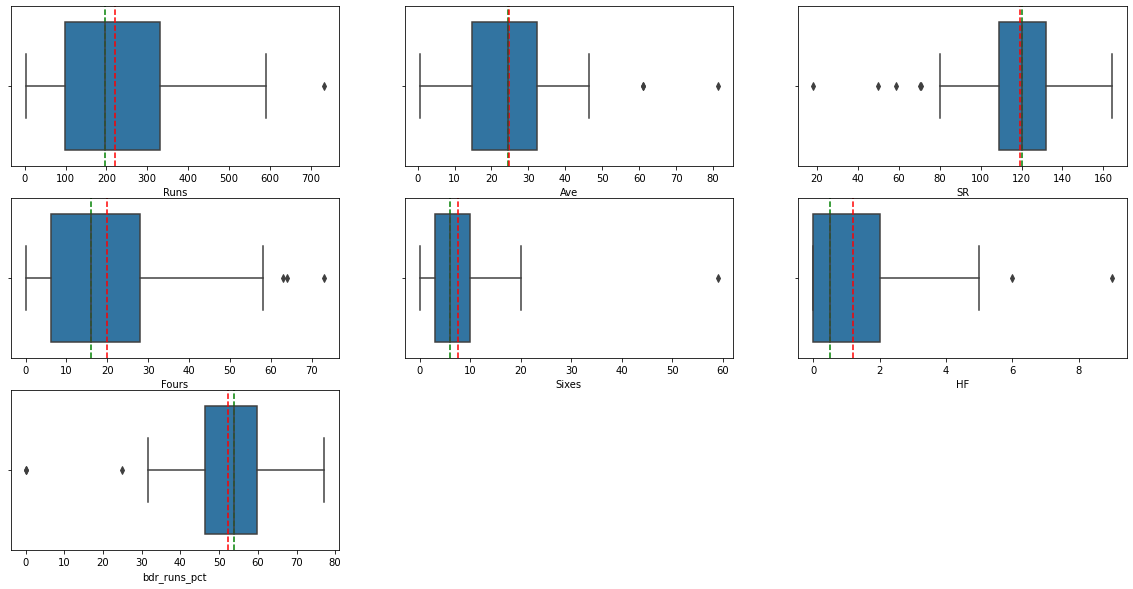

In [49]:
# plot boxplots
fig, ax = plt.subplots(3,3,figsize=(20,10))
fig.delaxes(ax[2,1])
fig.delaxes(ax[2,2])
ax=ax.flatten()
j=0
cols = ipl.drop(columns = ['Name']).columns

for i in cols:
    sns.boxplot(ipl[i],ax=ax[j]);
    ax[j].axvline(ipl[i].median(),ls='--',c="g")
    ax[j].axvline(ipl[i].mean(),ls='--',c="r")
    j+=1 

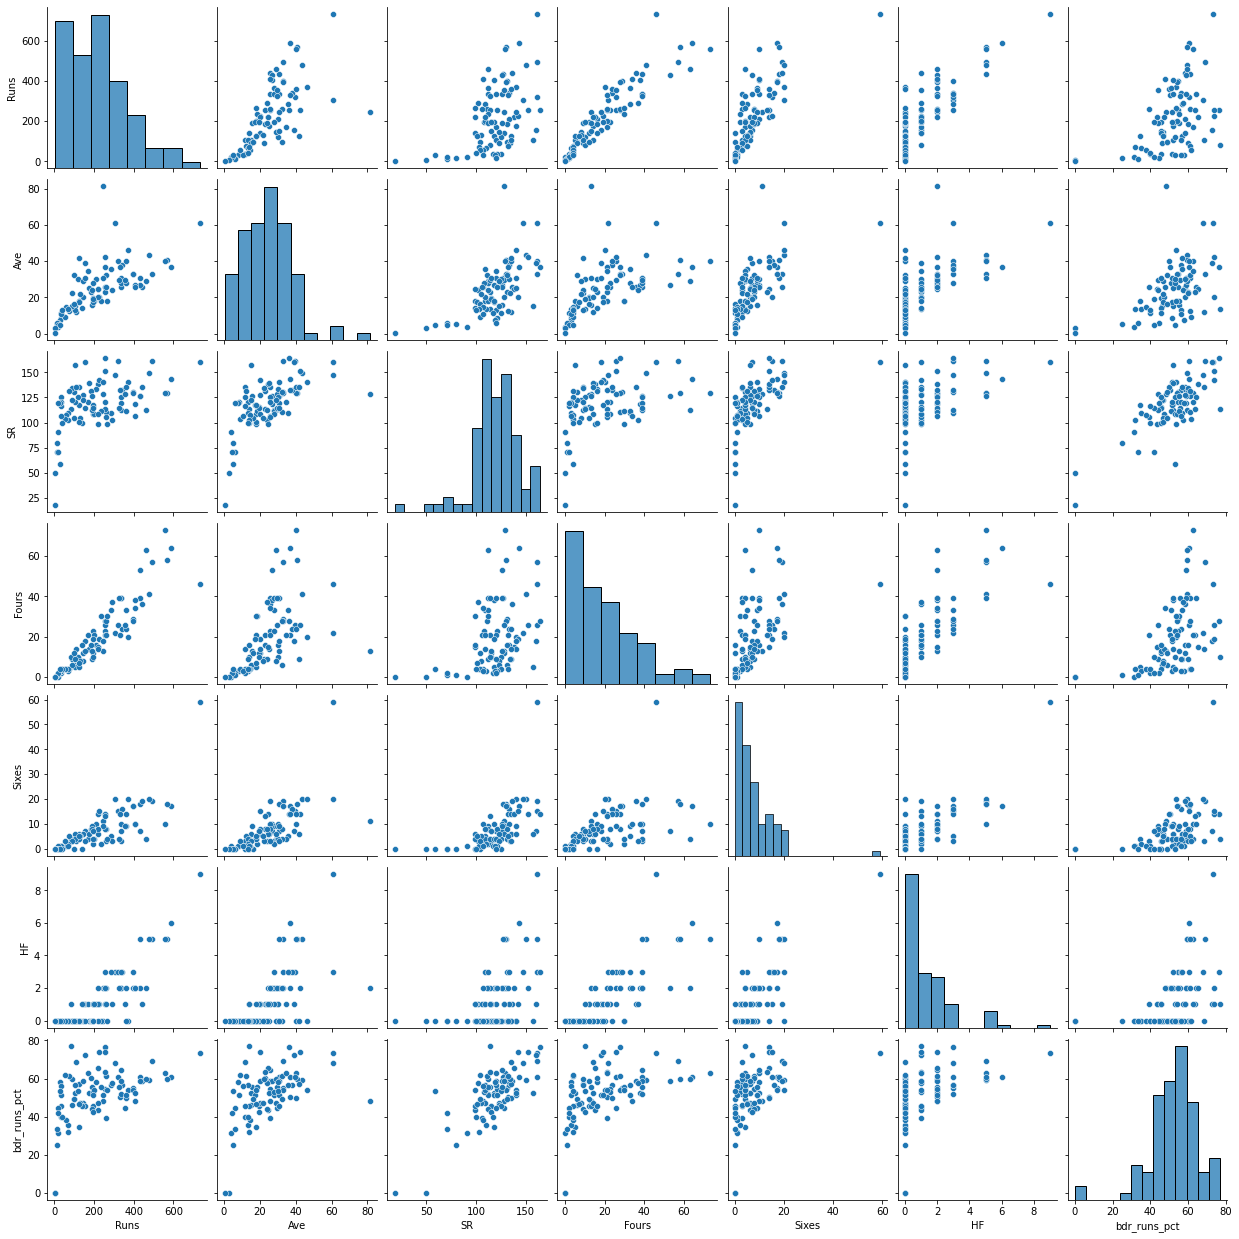

In [50]:
# plot pairplot & heatmap
sns.pairplot(ipl)

<AxesSubplot:>

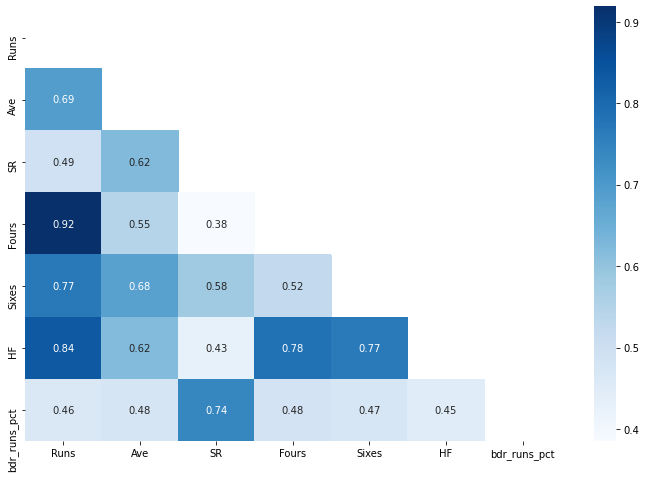

In [51]:
# plot correlation heatmap
plt.figure(figsize=(12,8))
corr = ipl.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask,annot=True, cmap = 'Blues')

### Further add your EDA studies to both case studies. Only select samples have been demonstrated